In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1.讀入FASHION_MNIST數據集

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### 2.觀察數據集的內容

In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

In [6]:
#查看種類有幾種
len(np.unique(y_train))

10

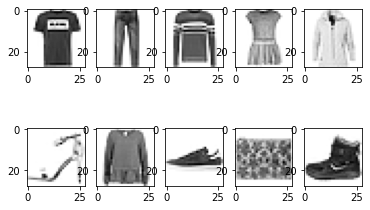

In [7]:
#獎每個種類印出來
for i in range(10):
    num = np.where(y_train == i)[0][0]
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[num], cmap = "Greys")

In [8]:
#由上圖知道y_train所代表的意義
# class_names = ['短袖圓領T恤', '褲子', '套衫', '連衣裙', '外套', '涼鞋', '襯衫', '運動鞋','包', '短靴']
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

ans: Ankle boot


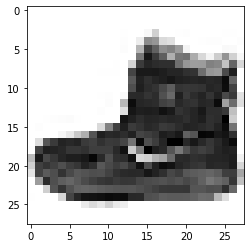

In [9]:
plt.imshow(x_train[0], cmap = "Greys")
print("ans:", class_names[y_train[0]])

### 3.資料整理

In [10]:
#使資料介於0-1之間
x_train = x_train/255
x_test = x_test/255

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
#將資料拉平
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)

In [13]:
#將y_train變成one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [14]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### 4. 打造神經網路

1. 將loss function改成categorical_crossentropy
2. 將optimzer改成Nadam
3. 將神經元個數改成128

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Nadam

In [16]:
model = Sequential()

In [ ]:
#第一層
model.add(Dense(128, input_dim = 28*28 ,activation = 'relu')) #relu:忽略小於0的值，大於0的值為線性
#第二層
model.add(Dense(128, activation = 'relu'))
#第三層
model.add(Dense(10, activation = 'softmax')) #softmax:將數字做轉換到0-1之間

In [ ]:
#將神經網路組合起來
model.compile(loss = 'categorical_crossentropy', optimizer = Nadam(), metrics = ['accuracy'])

In [ ]:
model.summary()

### 5. 訓練

In [20]:
#訓練時，每64次調整一次參數，循環訓練50次
model.fit(x_train, y_train, batch_size = 100, epochs = 50)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 59us/sample - loss: 0.5294 - accuracy: 0.8143
Epoch 2/50
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3662 - accuracy: 0.8670
Epoch 3/50
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3267 - accuracy: 0.8806
Epoch 4/50
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2988 - accuracy: 0.8904
Epoch 5/50
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2822 - accuracy: 0.8952
Epoch 6/50
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2662 - accuracy: 0.9022
Epoch 7/50
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2528 - accuracy: 0.9059
Epoch 8/50
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2413 - accuracy: 0.9112
Epoch 9/50
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2303 - accuracy: 0.9145
Epoch 10/50
60

### 6.訓練結果

In [21]:
#不希望出現每個值出現的機率而是直接告訴我們最有可能的答案
result = model.predict_classes(x_test)

In [29]:
score = model.evaluate(x_test, y_test, batch_size = 100)
loss, acc = score
print('正確率：', acc)

10000/10000 [==============================] - 0s 26us/sample - loss: 0.6187 - accuracy: 0.8858
正確率： 0.8858


In [30]:
from ipywidgets import interact_manual

In [31]:
def show(n):
    plt.imshow(x_test[n].reshape(28, 28), cmap = "Greys")
    plt.title(class_names[ np.where(y_test[n] == 1)[0][0] ])
    print("prediction:", class_names[ result[n] ])

In [32]:
interact_manual(show, n = (0, 10000))

interactive(children=(IntSlider(value=5000, description='n', max=10000), Button(description='Run Interact', st…

<function __main__.show(n)>